## Imports

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import sys
plt.style.use('seaborn-paper')

# DBH distributions for field data and matched trees

Read field data, drop all species labeled as "Other"

In [2]:
field_data = gpd.read_file('../data/field_data/all_trees_dbh_150_dec_2019.shp')
field_data = field_data[field_data.species != 'Other']
field_data.head()

,DBH,is_gps,nov_2019,sum_2019,species,tree_X,tree_Y,geometry
0,227.0,0,0,0,Scots pine,395543.080001,6.789046e+06,POINT (395543.080 6789045.960)
1,159.0,0,0,0,Scots pine,395543.940001,6.789042e+06,POINT (395543.940 6789042.200)
2,151.0,0,0,0,Norway spruce,395550.940001,6.789038e+06,POINT (395550.940 6789038.420)
3,237.0,0,0,0,Norway spruce,395548.350001,6.789038e+06,POINT (395548.350 6789038.420)
4,178.0,0,0,0,Norway spruce,395549.720001,6.789038e+06,POINT (395549.720 6789037.880)


Read data for matched trees, drop all species labeled as "Other"

In [3]:
label_shapepath = Path('../data/labeled_tiles_fixed/')
matched_trees = gpd.read_file(label_shapepath/'matched_trees.shp')
matched_trees = matched_trees[matched_trees.species != 'Other']
matched_trees.species.value_counts()

Scots pine        1105
Norway spruce      725
Birch              564
European aspen     443
Name: species, dtype: int64

Combine these for plotting purposes

In [6]:
interesting_matched = matched_trees[['species', 'dbh', 'is_gps']].copy()
interesting_matched['Data set'] = 'Matched trees'
interesting_field = field_data[['species', 'DBH', 'is_gps']].copy()
interesting_field['Data set'] = 'All field data'
interesting_matched.rename(columns={'dbh':'DBH'}, inplace=True)
combined = pd.concat((interesting_matched, interesting_field))
combined.loc[combined.is_gps == 0, 'is_gps'] = 'Field plot'
combined.loc[combined.is_gps == 1, 'is_gps'] = 'Single tree'
combined.rename(columns={'is_gps': 'Collection method', 'species': 'Species'}, inplace=True)
combined.sort_values(by='Species', axis=0, inplace=True)
combined.head()

,Species,DBH,Collection method,Data set
0,Birch,258.0,Field plot,Matched trees
2538,Birch,160.0,Single tree,Matched trees
2540,Birch,150.0,Single tree,Matched trees
2542,Birch,180.0,Single tree,Matched trees
4402,Birch,246.0,Field plot,All field data


Plot DBH statistics as violin plot

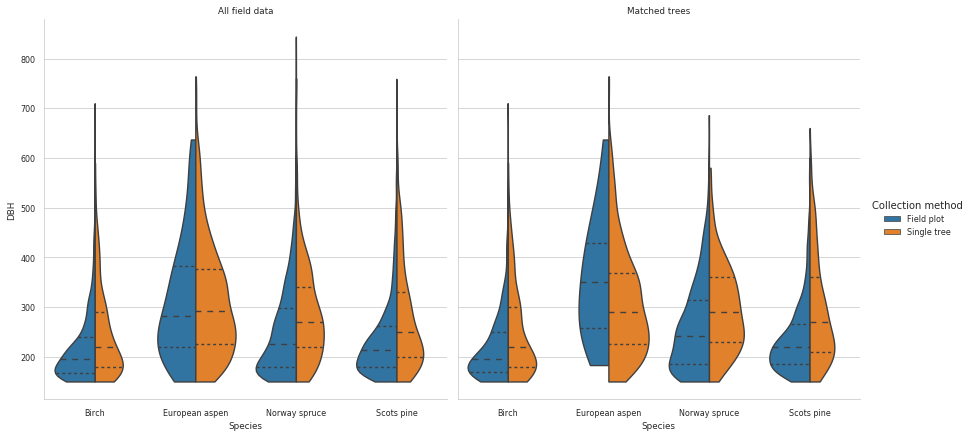

In [8]:
sns.set_style('whitegrid')

g = sns.catplot(y='DBH', x='Species', hue='Collection method', 
                data=combined, kind='violin', split=True, cut=0, #bw=0.2, 
                col='Data set', col_wrap=2, scale='area', scale_hue=True, inner='quartile', gridsize=100,
                legend_out=True, order=sorted(combined.Species.unique()), 
                col_order=['All field data', 'Matched trees'], 
                height=6, 
               )
g.set_titles('{col_name}')
plt.show()

As seen above, Aspen has on average largest DBH for both collection methods in both data sets (All field data and Matched trees)

# Height distributions for matched trees

In [26]:
interesting_matched = matched_trees[['species', 'Height_m', 'is_gps']].copy()
interesting_matched.rename(columns={'is_gps': 'Collection method', 'species': 'Species'}, inplace=True)
interesting_matched.loc[interesting_matched['Collection method'] == 0, 'Collection method'] = 'Field plot'
interesting_matched.loc[interesting_matched['Collection method'] == 1, 'Collection method'] = 'Single tree'

Plot height distributions as violin plot

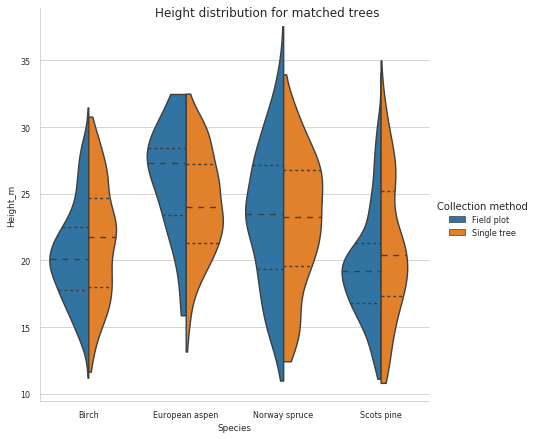

In [27]:
sns.set_style('whitegrid')

g = sns.catplot(y='Height_m', x='Species', hue='Collection method', 
                data=interesting_matched, kind='violin', split=True, cut=0, #bw=0.2, 
                scale='area', scale_hue=True, inner='quartile', gridsize=100,
                legend_out=True, order=sorted(interesting_matched.Species.unique()), 
                height=6
               )
g.set_titles('{col_name}')
g.fig.suptitle( 'Height distribution for matched trees')
plt.show()

Interestingly, for Norway spruce it seems that trees from field plots have on average larger height compared to single tree measurements, whereas for pine and birch it's vice versa. For aspen, data from field plots contains only 19 trees, so the distribution is not really representative. 